In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math

def oneD_fft(n,x):
    if len(x) == 1:
        return x
    y = np.zeros(n,dtype='complex128')
    Feven = oneD_fft(n//2,x[0::2])
    Fodd = oneD_fft(n//2,x[1::2])
    
    for k in range(n//2):
        wk = np.exp(-2*np.complex(0,1)*np.pi*k/n)
        y[k] = Feven[k] + wk * Fodd[k]
        y[k+n//2] = Feven[k] - wk * Fodd[k]
    return y    
    
    
fft = oneD_fft(8,[1,2,3,4,5,6,7,8]) 
print(np.fft.fft([1,2,3,4,5,6,7,8]))
print(fft)

[36.+0.j         -4.+9.65685425j -4.+4.j         -4.+1.65685425j
 -4.+0.j         -4.-1.65685425j -4.-4.j         -4.-9.65685425j]
[36.+0.j         -4.+9.65685425j -4.+4.j         -4.+1.65685425j
 -4.+0.j         -4.-1.65685425j -4.-4.j         -4.-9.65685425j]


True


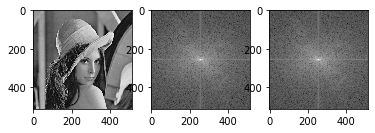

In [4]:
def twoD_fft(img):
    m,n = img.shape
    fft = np.zeros((m,n),dtype='complex128')
    fft1 = np.zeros((m,n),dtype='complex128')
    for i in range(m):
        fft1[i,:] = oneD_fft(n,img[i,:]).astype('complex128')
    for j in range(n):
        fft[:,j] = oneD_fft(m,fft1[:,j]).astype('complex128')
    inbuilt = np.fft.fftshift(np.fft.fft2(img))
    fft1 = np.fft.fftshift(fft)
#     print(fft)
    
    
    
    magnitude_speci = np.log(1 + np.abs(inbuilt))
    magnitude_spec = np.log(1 + np.abs(fft1))
    print(np.allclose(inbuilt,fft1))
    plt.figure()
    plt.subplot(131)
    plt.imshow(img,'gray')
    plt.subplot(132)
    plt.imshow(magnitude_spec,'gray')
    plt.subplot(133)
    plt.imshow(magnitude_speci,'gray')
    
im = cv2.imread('../input/lena.jpg',0)    
# im = np.array([[1,1],[1,1]])
twoD_fft(im)